In [250]:
import pandas as pd 
from pandas.plotting import table
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from datetime import date 
import math

# configurations
# this script is applicatble only for ring-molecules
NUM_CARBON = 8

# Read data from file 
date_computed = str(date.today())
file_path = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")

In [251]:
# Plot histogram to observe distribution
data = pd.read_csv(file_path)

# angles 21 - 28 

# [-2:]

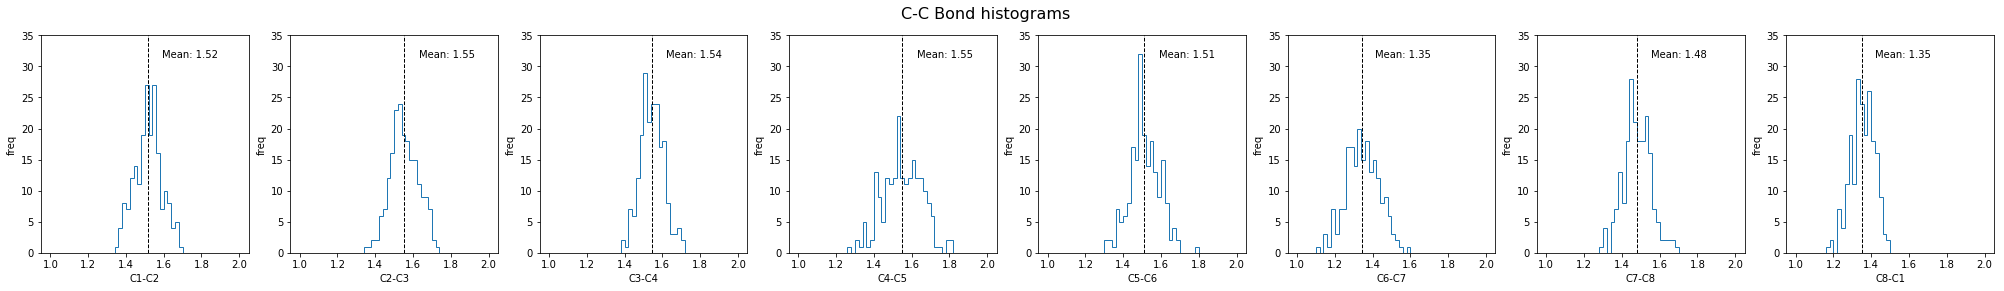

In [252]:
# plot C-C bonds
# data.iloc[:,1:9]
# range=(1, 2)
C_C_df = data.iloc[:,1:9]
fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
fig.suptitle('C-C Bond histograms', size=16) 

for col, axe in zip(C_C_df.columns, axes):
        x = C_C_df[col]
        axe.hist(x, bins=50, range=(1, 2), histtype='step', label=col)
        axe.set_xlabel(col)
        axe.set_ylabel('freq')
        axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axe.set_ybound(lower=0,upper=35)
        ymin,ymax=axe.get_ylim()
        axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals","histograms", date_computed + "_C_C_IC_value" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visuals' & 'histograms' folder if not existed yet
plt.savefig(output_path)

In [253]:
# # Plot how each IC varies (w.r.t. traj#)
# sub_data = data.iloc[:,1:] # slice off first column (TRAJ #)
# sub_data.plot(kind="line", subplots=True, layout=(6, 6), figsize=(20, 20), sharex=False, title="Value vs Traj");
# #------------------------- Output to file ----------------------#
# output_path = os.path.join(".", "visuals", date_computed + "_hop21_IC_value_variations" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visual' folder if not existed yet
# plt.savefig(output_path)

In [254]:
# --------------- Graph showing correlation between initial structure vs. structure at twist -------------# 
# Read data from file 
date_computed = str(date.today())
file_path_1 = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")
file_path_2 = os.path.join(".", "output", date_computed + "_hop21_internal_geometry" + ".csv")
initial_data = pd.read_csv(file_path_1)
hop_data = pd.read_csv(file_path_2)

# ----------------------- Merge & filter ----------------------- #
dih_merge = pd.merge(initial_data.iloc[:,:], \
                         hop_data.iloc[:,:], \
                         suffixes=('_initial','_hop'), on='TRAJ')

In [265]:
# ------------------- Compute mean for dihedrals ----------------- #
split_index = math.ceil(len(dih_merge.columns)/2)
mean_initial = dih_merge.iloc[:,1:split_index].mean(axis=0).rename('initial').to_frame() 
mean_hop = dih_merge.iloc[:,split_index:].mean(axis=0).rename('hop').to_frame() 
mean_initial.set_axis(hop_data.columns[1:], axis=0, inplace=True)
mean_hop.set_axis(hop_data.columns[1:], axis=0, inplace=True)

# Merge
compare_mean = pd.concat([mean_initial, mean_hop], axis=1, sort=False).reset_index()                                           # axis{0/’index’, 1/’columns’},

# Strip all cols with C-H bonds
compare_mean.drop(range(8,20), axis=0, inplace=True)

compare_mean.index = range(len(compare_mean))

display(compare_mean[-2:])

,index,initial,hop
16,dih H9-C6-C7-H10,7.504124,49.029071
17,dih H11-C8-C1-H12,10.743849,45.512307


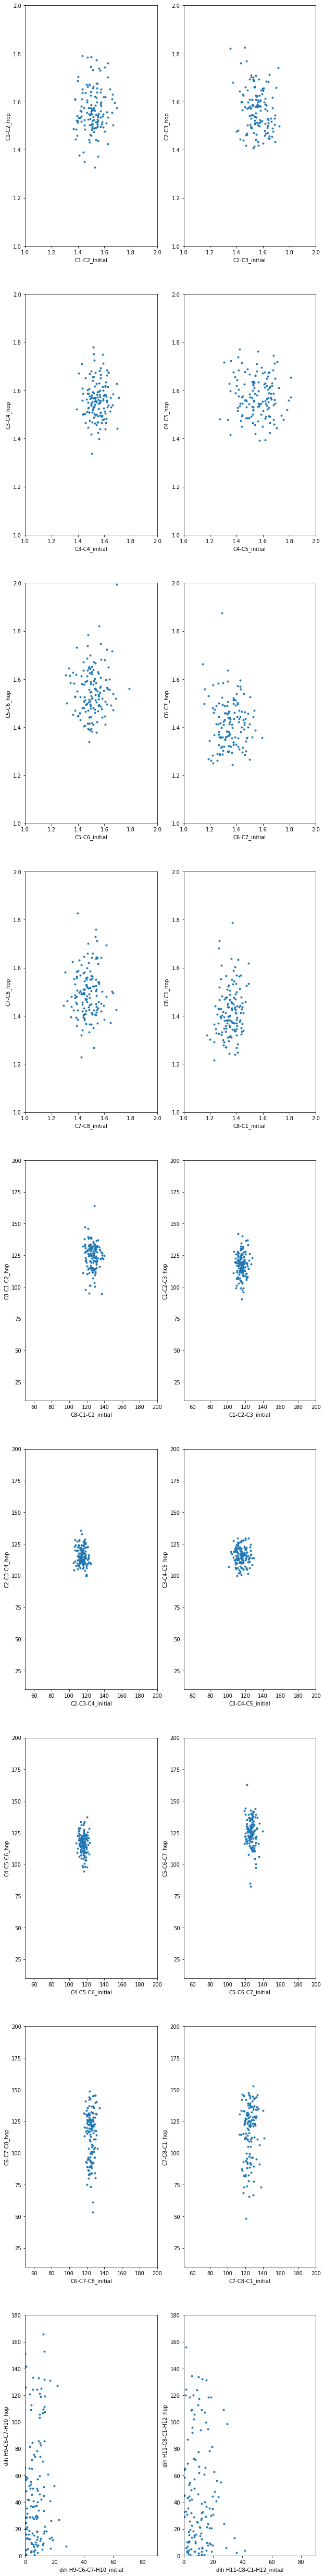

In [259]:
# ----------------------- Plot ----------------------- #
# plt.subplot(121) nrows, ncols, and index
figure_nrows = math.ceil(len(compare_mean)/2)
figure_ncols = 2
plt.figure(figsize=(10,10*figure_nrows))

# -------------- C-C bonds range(1,8) --------------
C_C_stop=NUM_CARBON
for col, axe_index in zip(compare_mean['index'][0:C_C_stop], range(1,C_C_stop+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(1,2)
    plt.ylim(1,2)
    axe_index+=1

# -------------- C-C-C angles range(20,28) --------------
for col, axe_index in zip(compare_mean['index'][C_C_stop:-2], range(C_C_stop+1,len(compare_mean)-1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(50,200)
    plt.ylim(10,200)
    axe_index+=1

# -------------- dihedrals rang(29,31) --------------
for col, axe_index in zip(compare_mean['index'][-2:], range(len(compare_mean)-1,len(compare_mean)+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(0,90)
    plt.ylim(0,180)
    axe_index+=1
    
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals", "initial_vs_hop", date_computed + "_initial_vs_hop" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
plt.savefig(output_path)

In [241]:
# Mini notes:
'''
should turn hop vs initial into a loop, do for all ICs -- see that repetition :))

reorganize suplots by modifying figure, not by reshaping axes
python doesnt have a++
'''
# Reference: 
'''
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_axis.html  --- to rename
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels
'''

'\nshould turn hop vs initial into a loop, do for all ICs -- see that repetition :))\n\nreorganize suplots by modifying figure, not by reshaping axes\npython doesnt have a++\n'